# Notebook for testing that timm works

Load pretrained model

In [1]:
import torch
import timm
m = timm.create_model('resnet50', pretrained=True, num_classes=0)
m.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequen

Potential similarity calculator

In [2]:
import numpy as np

random_inputs = torch.randn(4, 3, 250, 250)
random_outputs = m(random_inputs)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
for output in random_outputs:
    print(cos(output, random_outputs))
#     print(torch.matmul(output, random_outputs.T))

tensor([1.0000, 0.9745, 0.9756, 0.9741], grad_fn=<DivBackward0>)
tensor([0.9745, 1.0000, 0.9767, 0.9803], grad_fn=<DivBackward0>)
tensor([0.9756, 0.9767, 1.0000, 0.9773], grad_fn=<DivBackward0>)
tensor([0.9741, 0.9803, 0.9773, 1.0000], grad_fn=<DivBackward0>)


Loading images from folder

In [14]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('../data/cats_and_dogs', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

images, labels = next(iter(dataloader))


In [15]:
print(images.shape)

torch.Size([10, 3, 224, 224])


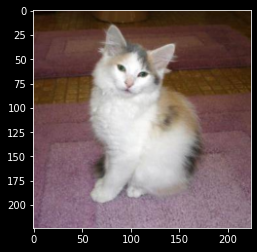

In [16]:
import matplotlib.pyplot as plt

def plot_image(image_tensor):
    plt.imshow(image_tensor.permute(1, 2, 0))
    plt.show()
plot_image(images[0])

Check cats vs dogs

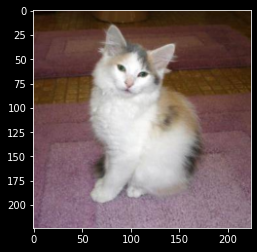

tensor([1.0000, 0.5859, 0.5814, 0.5797, 0.6181, 0.6808, 0.2368, 0.2446, 0.3657,
        0.2562], grad_fn=<DivBackward0>)


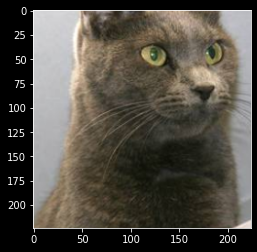

tensor([0.5859, 1.0000, 0.7514, 0.4447, 0.5270, 0.6890, 0.2208, 0.3833, 0.2594,
        0.3163], grad_fn=<DivBackward0>)


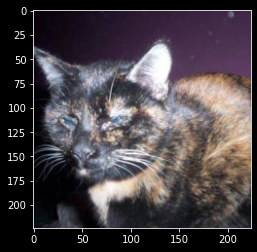

tensor([0.5814, 0.7514, 1.0000, 0.4399, 0.5958, 0.6840, 0.2913, 0.3145, 0.2977,
        0.2947], grad_fn=<DivBackward0>)


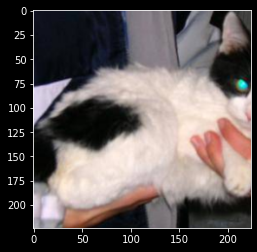

tensor([0.5797, 0.4447, 0.4399, 1.0000, 0.4324, 0.6373, 0.2531, 0.2820, 0.4324,
        0.2965], grad_fn=<DivBackward0>)


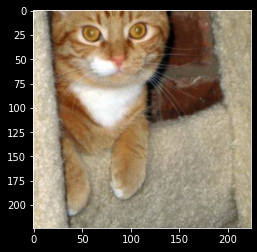

tensor([0.6181, 0.5270, 0.5958, 0.4324, 1.0000, 0.5494, 0.2456, 0.2110, 0.3353,
        0.2439], grad_fn=<DivBackward0>)


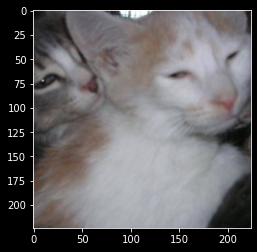

tensor([0.6808, 0.6890, 0.6840, 0.6373, 0.5494, 1.0000, 0.2704, 0.3109, 0.3167,
        0.3061], grad_fn=<DivBackward0>)


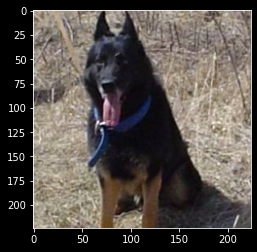

tensor([0.2368, 0.2208, 0.2913, 0.2531, 0.2456, 0.2704, 1.0000, 0.4233, 0.5161,
        0.5345], grad_fn=<DivBackward0>)


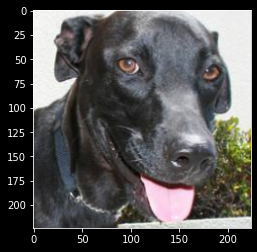

tensor([0.2446, 0.3833, 0.3145, 0.2820, 0.2110, 0.3109, 0.4233, 1.0000, 0.3824,
        0.4468], grad_fn=<DivBackward0>)


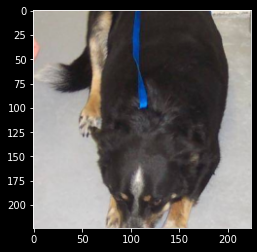

tensor([0.3657, 0.2594, 0.2977, 0.4324, 0.3353, 0.3167, 0.5161, 0.3824, 1.0000,
        0.4984], grad_fn=<DivBackward0>)


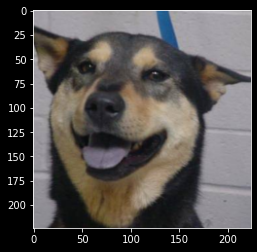

tensor([0.2562, 0.3163, 0.2947, 0.2965, 0.2439, 0.3061, 0.5345, 0.4468, 0.4984,
        1.0000], grad_fn=<DivBackward0>)


In [17]:
outputs = m(images)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
for index,output in enumerate(outputs):
    plot_image(images[index])
    print(cos(output, outputs))